# Holt-Winters time series forecasting CASO 1

Integrantes: Maria Paula Malavet, Juliette Martínez Bermúdez, Alejandra Tovar Rodríguez.


Usando el instructivo de ExponentialSmoothing:

https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html#statsmodels.tsa.holtwinters.ExponentialSmoothing

Verificamos que estén instalados los paquetes necesarios.

pip install pandas

pip install numpy

pip install matplotlib

código de referencia https://www.statsmodels.org/v0.10.2/examples/notebooks/generated/exponential_smoothing.html

Documentación modelo: https://otexts.com/fpp2/holt-winters.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.base.model import Results

Importamos los datos de demanda.

In [2]:
#df = pd.read_excel (r'/Users/juliemac/Desktop/Documents/University/2020-3/Producción/Ejercicios/DemandaPython.xlsx')
df = pd.read_csv('DemandaPythonCaso1.csv')
df

,Demanda
0,4128
1,4026
2,3492
3,3768
4,3204
...,...
915,10836
916,10338
917,11562
918,10434


Se realiza el modelo Holt winters, para este caso tomamos toda la información disponible de demanda, seleccionamos el trend y seasonal que mejor resultado genera al observar la gráfica con la predicción. Probamos distintos números para "seasonal_periods" y seleccionamos el que genera menor MAD.

0       4211.678471
1       4111.001321
2       3585.644446
3       3850.241362
4       3298.326941
           ...     
942     7015.478152
943     7300.466044
944     6538.819560
945     9612.606530
946    10217.171261
Length: 947, dtype: float64

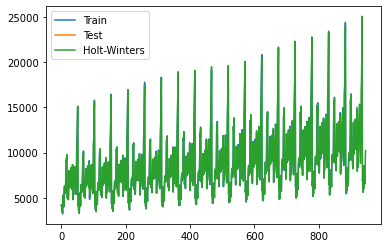

In [3]:
df.index.freq = 'MS'
train, test = df.iloc[:920, 0], df.iloc[920:, 0]
model = ExponentialSmoothing(train,trend='add', seasonal='mul', seasonal_periods=52,damped=True).fit()
#La tendencia es lineal por tanto add, seasonal es mul puesto que la amplitud aumenta.
pred = model.predict(start=0, end=946)
#The number of periods in a complete seasonal cycle
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')
pred

A continuación los valores de las predicciones para el periodo 921-946.

In [4]:
pred.iloc[921:]

921    10122.800922
922     8342.969798
923    10370.674228
924    12777.702772
925    13525.580481
926    14627.260756
927    15359.967915
928    10313.934060
929     9444.013607
930     8807.599305
931    10163.342975
932    16850.626154
933    17935.322356
934    20444.703156
935    25110.279938
936     6845.278859
937     7279.105677
938     5596.265057
939     6870.660526
940     5984.911781
941     8554.542598
942     7015.478152
943     7300.466044
944     6538.819560
945     9612.606530
946    10217.171261
dtype: float64

In [5]:
forecasting=pred.iloc[921:]
#forecasting=pd.DataFrame(forecasting,,columns='Demanda')
forecasting=pd.DataFrame(forecasting.values, columns = ["Demanda"])
forecasting.to_csv('forecasting.csv')

A continuación los valores de predicción hasta el periodo conocido.

In [6]:
pred2=pred.copy()

pred2=pred2.iloc[:921]
pred2
pred2=pd.DataFrame(pred2.values, columns = ["Ft"])
pred2.to_csv('Ft.csv')
pred2

,Ft
0,4211.678471
1,4111.001321
2,3585.644446
3,3850.241362
4,3298.326941
...,...
916,10402.219923
917,11261.634937
918,10318.243150
919,14806.084316


In [7]:
result = pd.concat([df, pred2], axis=1, sort=False)
result

,Demanda,Ft
0,4128.0,4211.678471
1,4026.0,4111.001321
2,3492.0,3585.644446
3,3768.0,3850.241362
4,3204.0,3298.326941
...,...,...
916,10338.0,10402.219923
917,11562.0,11261.634937
918,10434.0,10318.243150
919,14988.0,14806.084316


A continuación la tabla con los valores de demanda y pronóstico para cada periodo.

In [8]:
result.columns = ['Demanda', 'Pronóstico']
result

,Demanda,Pronóstico
0,4128.0,4211.678471
1,4026.0,4111.001321
2,3492.0,3585.644446
3,3768.0,3850.241362
4,3204.0,3298.326941
...,...,...
916,10338.0,10402.219923
917,11562.0,11261.634937
918,10434.0,10318.243150
919,14988.0,14806.084316


In [9]:
result['absError/Demand'] = abs((result['Pronóstico']-result['Demanda'])/result['Demanda'])
result

,Demanda,Pronóstico,absError/Demand
0,4128.0,4211.678471,0.020271
1,4026.0,4111.001321,0.021113
2,3492.0,3585.644446,0.026817
3,3768.0,3850.241362,0.021826
4,3204.0,3298.326941,0.029440
...,...,...,...
916,10338.0,10402.219923,0.006212
917,11562.0,11261.634937,0.025979
918,10434.0,10318.243150,0.011094
919,14988.0,14806.084316,0.012137


In [10]:
result['absError'] = abs((result['Pronóstico']-result['Demanda']))
result

,Demanda,Pronóstico,absError/Demand,absError
0,4128.0,4211.678471,0.020271,83.678471
1,4026.0,4111.001321,0.021113,85.001321
2,3492.0,3585.644446,0.026817,93.644446
3,3768.0,3850.241362,0.021826,82.241362
4,3204.0,3298.326941,0.029440,94.326941
...,...,...,...,...
916,10338.0,10402.219923,0.006212,64.219923
917,11562.0,11261.634937,0.025979,300.365063
918,10434.0,10318.243150,0.011094,115.756850
919,14988.0,14806.084316,0.012137,181.915684


Posteriormente, calculamos el DAM.

In [11]:
result['absError'].mean()

104.60531901521676

Posteriormente, calculamos el MAPE.

In [12]:
result['absError/Demand'].mean()

0.012184212731389872

## PARÁMETROS

In [13]:
df = pd.DataFrame(np.c_[train, model.level, model.slope, model.season, model.fittedvalues],
                  columns=[r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'],index=train.index)
df.append(model.forecast(8).rename(r'$\hat{y}_t$').to_frame(), sort=True)
df.to_csv('modelValues.csv')
df


,$y_t$,$l_t$,$b_t$,$s_t$,$\hat{y}_t$
0,4128.0,5247.460800,3.664716,0.786682,4211.678471
1,4026.0,5245.410668,3.363587,0.767545,4111.001321
2,3492.0,5241.559206,2.983529,0.666237,3585.644446
3,3768.0,5238.646453,2.672916,0.719286,3850.241362
4,3204.0,5233.429973,2.257431,0.612244,3298.326941
...,...,...,...,...,...
915,10836.0,8721.097596,4.293211,1.242506,10890.361152
916,10338.0,8722.555235,4.143564,1.185205,10402.219923
917,11562.0,8738.948616,4.787898,1.323088,11261.634937
918,10434.0,8748.898825,5.059145,1.192615,10318.243150


In [14]:
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'smoothing_seasonal', 'initial_level', 'initial_slope']
results["Multiplicative"]       = [model.params[p] for p in params] + [model.sse]
results.to_csv('parameters.csv')
results

,Multiplicative
$\alpha$,5.263158e-02
$\beta$,5.263157e-02
$\phi$,9.999000e-01
$\gamma$,9.473684e-01
$l_0$,5.249000e+03
$b_0$,3.954216e+00
SSE,1.562245e+07
